In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
import numpy as np
from datetime import datetime

In [3]:
data = pd.read_csv("felix_hernandez.csv")

C:\Users\sstrosko\AppData\Local\Continuum\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,CU,2017-09-14,80.7,-2.2586,6.1170,Felix Hernandez,608336,433587,double,hit_into_play_no_out,...,53.9856,0.803,1.184,1.25,1,1,1,6,33,6
1,CH,2017-09-14,86.2,-2.6494,6.0629,Felix Hernandez,608336,433587,null,ball,...,54.3916,0.000,0.000,null,null,null,null,null,33,5
2,CH,2017-09-14,87.8,-2.3620,5.8743,Felix Hernandez,608336,433587,null,ball,...,54.2151,0.000,0.000,null,null,null,null,null,33,4
3,CH,2017-09-14,86.1,-2.6921,5.7950,Felix Hernandez,608336,433587,null,foul,...,54.2372,0.000,0.000,null,null,null,null,1,33,3
4,CU,2017-09-14,80.8,-2.6114,6.1394,Felix Hernandez,608336,433587,null,swinging_strike,...,54.2401,0.000,0.000,null,null,null,null,null,33,2


In [5]:
data['game_date'] = pd.to_datetime(data['game_date'])

In [6]:
data['release_speed'] = pd.to_numeric(data['release_speed'], errors='coerce')

In [7]:
data.loc[data['release_speed'] < 70, 'release_speed'] = np.NaN

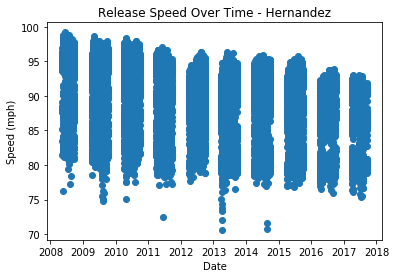

In [8]:
plt.plot_date(data['game_date'], data['release_speed'])
plt.title('Release Speed Over Time - Hernandez')
plt.xlabel('Date')
plt.ylabel('Speed (mph)')
plt.show()

In [9]:
data.loc[data['pitch_type'] == 'null'] = np.NaN
data.loc[data['pitch_type'] == 'PO'] = np.NaN
data.loc[data['pitch_type'] == 'IN'] = np.NaN
data.loc[data['pitch_type'] == 'FA'] = np.NaN
data.loc[data['pitch_type'] == 'UN'] = np.NaN
data['pitch_type'].value_counts()

SI    8358
FF    7369
CH    5899
CU    4213
SL    3079
FC     745
Name: pitch_type, dtype: int64

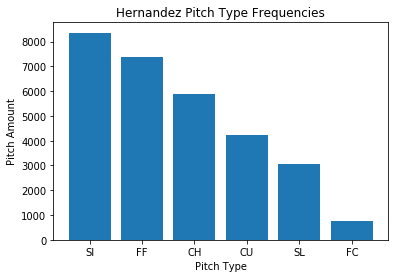

In [10]:
#width = (2 / 3) / len(data['pitch_type'].columns)
x_axis = ['SI', 'FF', 'CH', 'CU', 'SL', 'FC']
bars = np.arange(len(x_axis))
width = [8358, 7369, 5899, 4213, 3079, 745]
plt.bar(bars, width)
plt.xticks(bars, x_axis)
plt.title('Hernandez Pitch Type Frequencies')
plt.xlabel('Pitch Type')
plt.ylabel('Pitch Amount')
plt.show()